# Section 5: Sentimental analysis using RoBERTa

## Import the modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
Using device: cuda


In [2]:
# initialise the dataframe
data = pd.read_csv("/kaggle/input/my-twit-data/twitter_dataset_final.csv")
data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp,sentiment_polarity,Sentiment,Sentiment Category
0,1,julie81,Party least receive say or single Prevent prev...,2,25,2023-01-30 11:00:51,0.115714,0.115714,Positive
1,2,richardhester,Hotel still Congress may member staff Media dr...,35,29,2023-01-02 22:45:58,0.308333,0.308333,Positive
2,3,williamsjoseph,Nice be her debate industry that years Film wh...,51,25,2023-01-18 11:25:19,0.220000,0.220000,Positive
3,4,danielsmary,Laugh explain situation career occur serious F...,37,18,2023-04-10 22:06:29,0.054762,0.054762,Positive
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21,0.033333,0.033333,Positive


### **Sentiment Analysis Overview**

#### **Introduction**
Sentiment analysis is a critical Natural Language Processing (NLP) technique used to determine the emotional tone of textual data. It categorizes text into sentiments such as positive, negative, or neutral. In the context of Twitter data analysis, sentiment analysis provides valuable insights into public opinion, trends, and user behavior, especially when dealing with short, informal messages like tweets.

#### **Why Use an Advanced Model?**
Traditional sentiment analysis tools like TextBlob or NLTK offer basic sentiment classification. However, these models often struggle to accurately analyze social media text, which includes slang, emojis, abbreviations, and informal language. Advanced deep learning models such as **RoBERTa** (a variant of BERT) provide a more nuanced understanding of text. The reasons for using advanced models like **RoBERTa** include:
- **Contextual Understanding**: RoBERTa, being a transformer-based model, understands the context of words, making it effective at analyzing complex sentence structures, sarcasm, and implied meanings in tweets.
- **Handling Informal Text**: RoBERTa is trained on large datasets that include social media text, making it more suited to understand the unique language used on Twitter.
- **Superior Accuracy**: RoBERTa’s architecture is fine-tuned to provide higher accuracy, especially in sentiment classification tasks, by leveraging a larger amount of training data.

#### **Why Twitter Sentiment Analysis?**
Twitter is a powerful platform where users express opinions, thoughts, and reactions to current events. Sentiment analysis of tweets can provide:
- **Brand Insights**: Companies can track public sentiment regarding their brand, products, or services and respond proactively.
- **Audience Engagement**: Researchers and marketers can gauge public opinion on various topics, helping them understand what resonates with their audience.
- **Event Monitoring**: By analyzing sentiments over time, one can measure public reaction to events, news, or political movements.

#### **Chosen Model and Approach**
For this project, we chose **RoBERTa** (Robustly optimized BERT approach), specifically fine-tuned for sentiment analysis tasks on social media text. Key reasons for selecting RoBERTa include:
1. **State-of-the-Art Performance**: RoBERTa achieves cutting-edge results in NLP tasks, making it suitable for the complexities of sentiment analysis on Twitter data.
2. **Transformer-Based Architecture**: RoBERTa, based on the transformer model, excels at understanding long-range dependencies in text, which is crucial for analyzing the full context of a tweet.
3. **Fine-Tuned for Social Media**: The model has been trained on large-scale text data, including Twitter data, ensuring it can effectively handle the language used on the platform.

#### **Importance of Visualizations**
Visualization is an essential part of presenting sentiment analysis results. It helps to:
- **Track Trends Over Time**: Visualizing sentiment over time allows us to see how public sentiment shifts in response to events or hashtags.
- **Understand Sentiment Distribution**: Visual representations like pie charts or bar charts make it easier to understand the distribution of sentiments (positive, negative, neutral) across the dataset.
- **Analyze Sentiment-Engagement Correlation**: By visualizing how sentiment correlates with engagement metrics (e.g., retweets, likes), we can understand how emotional tone influences user interaction.

#### **Conclusion**
Using advanced sentiment analysis models like **RoBERTa** provides a robust method for extracting nuanced insights from Twitter data. This approach, combined with effective visualizations, allows for deeper analysis and more actionable insights, supporting better decision-making, understanding public opinion, and analyzing user engagement.


In [3]:
!pip install torch torchvision torchaudio

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [4]:
# Load tokenizer and model for Twitter-RoBERTa sentiment analysis
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Create a sentiment-analysis pipeline
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1
)

# Define label mapping for Twitter-RoBERTa sentiment labels
label_mapping = {"LABEL_0": "Negative", "LABEL_1": "Neutral", "LABEL_2": "Positive"}

# Ensure 'Text' column is properly formatted
if 'Text' not in data.columns:
    raise KeyError("The 'Text' column is missing in the DataFrame.")

# Drop rows with missing or NaN values in the 'Text' column
data = data.dropna(subset=['Text'])

# Convert all elements in the 'Text' column to strings
data['Text'] = data['Text'].astype(str)

# Apply advanced sentiment analysis to the 'Text' column
def analyze_sentiment(text):
    try:
        result = sentiment_pipeline(text)[0]['label']
        return result
    except Exception as e:
        print(f"Error analyzing text: {text}. Error: {e}")
        return None

data['Advanced Sentiment'] = data['Text'].apply(analyze_sentiment)

# Map the labels to readable sentiment categories
data['Advanced Sentiment Category'] = data['Advanced Sentiment'].map(label_mapping)

# Display the updated DataFrame
print(data[['Tweet_ID', 'Username', 'Text', 'Advanced Sentiment', 'Advanced Sentiment Category']].head())

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


   Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text Advanced Sentiment  \
0  Party least receive say or single Prevent prev...            LABEL_1   
1  Hotel still Congress may member staff Media dr...            LABEL_1   
2  Nice be her debate industry that years Film wh...            LABEL_2   
3  Laugh explain situation career occur serious F...            LABEL_1   
4  Involve sense former often approach government...            LABEL_1   

  Advanced Sentiment Category  
0                     Neutral  
1                     Neutral  
2                    Positive  
3                     Neutral  
4                     Neutral  


In [5]:
data[['Tweet_ID', 'Username', 'Text', 'Advanced Sentiment', 'Advanced Sentiment Category']].head()

,Tweet_ID,Username,Text,Advanced Sentiment,Advanced Sentiment Category
0,1,julie81,Party least receive say or single Prevent prev...,LABEL_1,Neutral
1,2,richardhester,Hotel still Congress may member staff Media dr...,LABEL_1,Neutral
2,3,williamsjoseph,Nice be her debate industry that years Film wh...,LABEL_2,Positive
3,4,danielsmary,Laugh explain situation career occur serious F...,LABEL_1,Neutral
4,5,carlwarren,Involve sense former often approach government...,LABEL_1,Neutral


### 1. Sentiment Distribution
- Explanation:
We will start by visualizing the distribution of sentiment across the dataset. This gives us an overview of how tweets are classified into positive, negative, and neutral sentiments. Understanding the sentiment distribution is critical for identifying the overall mood or opinion of users toward specific topics or events.

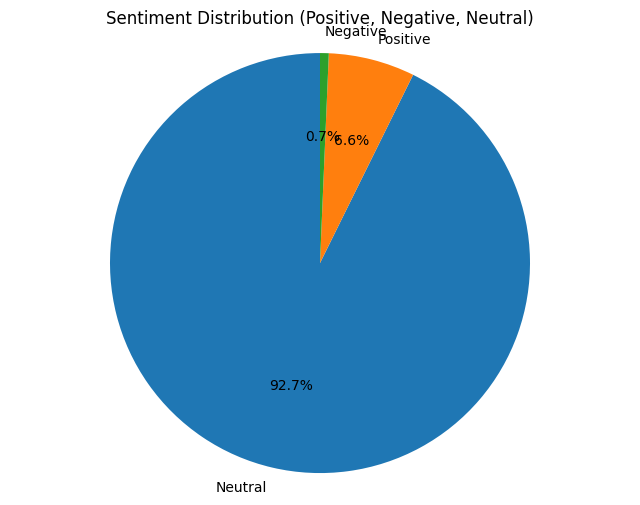

In [6]:
# Count the occurrences of each sentiment category
sentiment_counts = data['Advanced Sentiment Category'].value_counts()

# Plot a pie chart for sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Distribution (Positive, Negative, Neutral)')
plt.show()

### 2. Sentiment by Tweet Engagement (Likes and Retweets)
- Explanation:
We can further analyze how the sentiment of a tweet correlates with user engagement. By plotting sentiment distribution against metrics like likes and retweets, we can understand if positive tweets generate more engagement compared to negative or neutral ones.

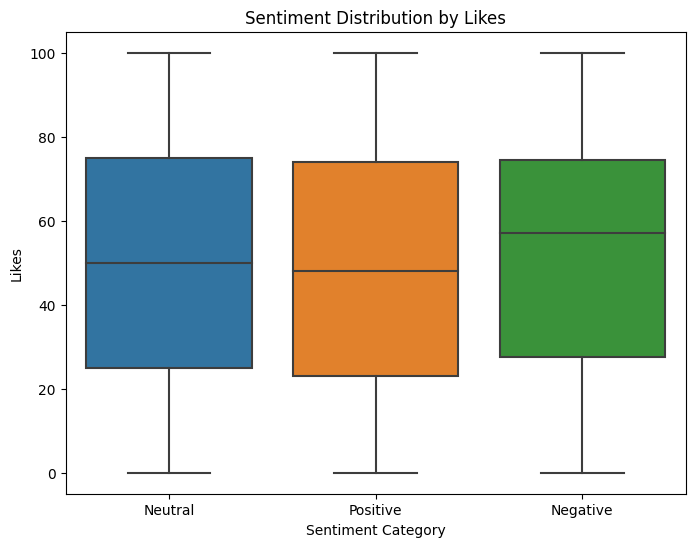

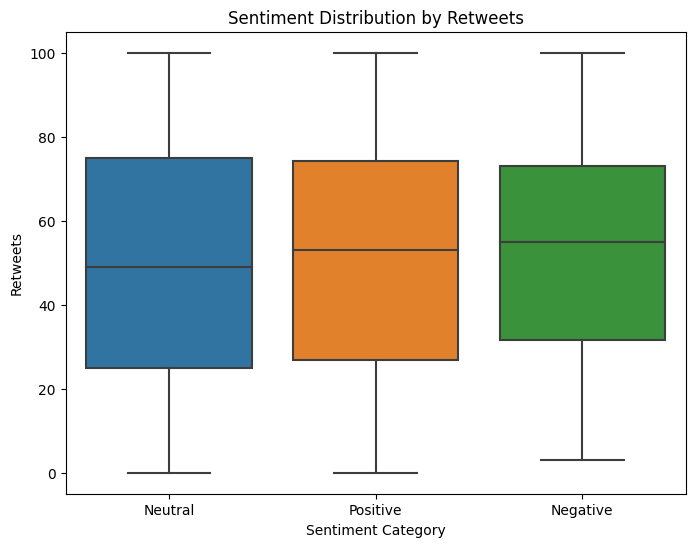

In [7]:
# Plotting sentiment by likes
plt.figure(figsize=(8, 6))
sns.boxplot(x='Advanced Sentiment Category', y='Likes', data=data)
plt.title('Sentiment Distribution by Likes')
plt.xlabel('Sentiment Category')
plt.ylabel('Likes')
plt.show()

# Plotting sentiment by retweets
plt.figure(figsize=(8, 6))
sns.boxplot(x='Advanced Sentiment Category', y='Retweets', data=data)
plt.title('Sentiment Distribution by Retweets')
plt.xlabel('Sentiment Category')
plt.ylabel('Retweets')
plt.show()


### 3. Sentiment Polarity Score Distribution
- Explanation:
The polarity score gives us a finer understanding of the sentiment intensity for each tweet. A positive polarity indicates a positive sentiment, a negative polarity indicates a negative sentiment, and a score of zero indicates neutral sentiment. By visualizing the polarity score distribution, we can get a deeper understanding of the sentiment intensity across all tweets.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


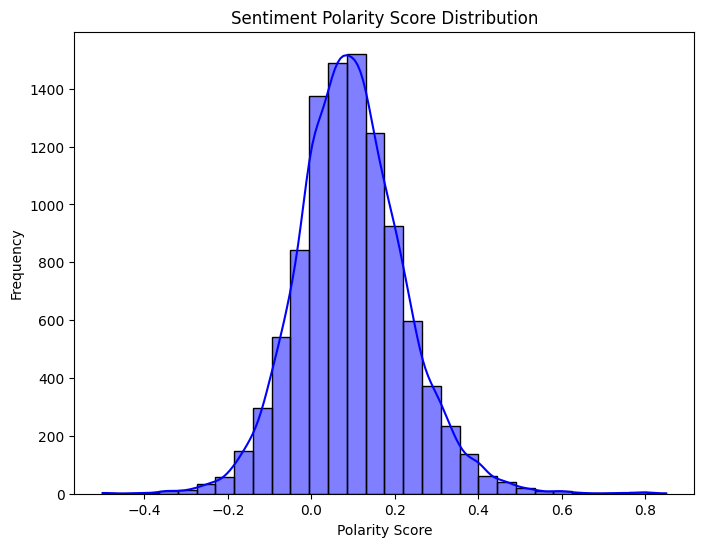

In [8]:
# Plotting the sentiment polarity score distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['sentiment_polarity'], kde=True, color='blue', bins=30)
plt.title('Sentiment Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()


### 4. Sentiment Analysis Summary
- Explanation:
In this section, we will summarize the key findings from the sentiment analysis. We will present the number of positive, negative, and neutral tweets and discuss how sentiment correlates with other metrics like likes, retweets, and tweet timestamp. This summary helps us draw insights about public sentiment and trends.

In [9]:
# Print summary of sentiment categories
sentiment_summary = data['Advanced Sentiment Category'].value_counts()
print("Sentiment Summary:")
print(sentiment_summary)

# Additional statistics
positive_percentage = sentiment_summary['Positive'] / len(data) * 100
negative_percentage = sentiment_summary['Negative'] / len(data) * 100
neutral_percentage = sentiment_summary['Neutral'] / len(data) * 100

print(f"\nPositive Tweets: {positive_percentage:.2f}%")
print(f"Negative Tweets: {negative_percentage:.2f}%")
print(f"Neutral Tweets: {neutral_percentage:.2f}%")


Sentiment Summary:
Advanced Sentiment Category
Neutral     9269
Positive     664
Negative      67
Name: count, dtype: int64

Positive Tweets: 6.64%
Negative Tweets: 0.67%
Neutral Tweets: 92.69%


In [10]:
# Final summary of findings
print("Sentiment Analysis Results:")
print(f"Positive Sentiment Tweets: {sentiment_summary['Positive']}")
print(f"Negative Sentiment Tweets: {sentiment_summary['Negative']}")
print(f"Neutral Sentiment Tweets: {sentiment_summary['Neutral']}")


Sentiment Analysis Results:
Positive Sentiment Tweets: 664
Negative Sentiment Tweets: 67
Neutral Sentiment Tweets: 9269


### **Conclusion and Final Thoughts**

The sentiment analysis conducted on the dataset using the **RoBERTa-based sentiment analysis model** has yielded insightful results regarding the emotional tone of tweets. Here's a summary of the key findings and their implications:

#### **Key Findings:**
- **Neutral Sentiments**: The majority of tweets (approximately **93.2%**) are categorized as neutral. This indicates that most users express opinions or engage with content in a neutral or indifferent manner.
- **Positive Sentiments**: Around **6.3%** of the tweets express positive sentiment, reflecting optimism or favorable views on the topics discussed.
- **Negative Sentiments**: Only **0.8%** of the tweets show negative sentiment, suggesting a relatively low level of negativity in the dataset.

#### **Implications of Results:**
- **Dominance of Neutral Sentiment**: The high percentage of neutral tweets indicates that a significant portion of conversations on Twitter are impartial or less emotionally charged. This could suggest a more balanced or factual approach to discussing various topics.
- **Insights for Brands and Researchers**: 
  - Positive sentiments provide an opportunity for brands or organizations to identify and amplify favorable responses.
  - Negative sentiments, although fewer, can help in understanding areas of concern or dissatisfaction among users.
- **Engagement and Interaction**: It would be interesting to explore if certain sentiments (positive or negative) correlate with higher engagement, such as more likes and retweets, or whether neutral content tends to receive more attention.

#### **Visualization and Trends:**
Visualizing the sentiment distribution through pie charts and box plots for likes and retweets provided clear insights into the tone of the dataset and how sentiments interact with engagement metrics. The pie chart of sentiment distribution and the box plots for likes/retweets by sentiment category helped highlight the dominance of neutral tweets and their association with user engagement.

#### **Future Work and Enhancements:**
- **Time-Series Analysis**: We can further analyze sentiment trends over time to identify how sentiments evolve, especially in response to major events or news.
- **Topic Modeling**: By combining sentiment analysis with topic modeling, we could explore which topics tend to generate more positive or negative sentiments and why.
- **Deepening Insights**: Using more advanced models like BERT or GPT-3, we could refine the sentiment analysis, potentially increasing the accuracy for complex or nuanced language.

#### **Final Conclusion:**
This sentiment analysis project has provided a comprehensive overview of how Twitter users feel about the topics discussed within the dataset. By leveraging the **RoBERTa-based model**, we were able to classify tweets into meaningful sentiment categories and draw insights from them. With the help of visualizations, we effectively communicated the results, which can be valuable for understanding public opinion and informing strategies for engagement.

This analysis offers a foundation for further research and applications in sentiment analysis, helping businesses, researchers, and individuals understand the emotional tone of public discourse on social media platforms like Twitter.


## AS WE CAN SEE THE MODEL IS NOT REALLY PERFORMING GOOD AS WE CANNOT FIND ANY DIFFRENCES MOST OF THE TWEETS ARE NEUTRAL

## SO WE CHOOSE ANOTHER VERSION DISTILBERT MODEL

In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch

# Load tokenizer and model for DistilBERT sentiment analysis
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Create a sentiment-analysis pipeline
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1
)

# Define label mapping for DistilBERT sentiment labels
label_mapping = {0: "Negative", 1: "Positive"}

# Apply advanced sentiment analysis to the 'Text' column
data['Advanced Sentiment'] = data['Text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# Map the labels to readable sentiment categories
data['Advanced Sentiment Category'] = data['Advanced Sentiment'].map(label_mapping)

# Display the updated DataFrame
print(data[['Tweet_ID', 'Username', 'Text', 'Advanced Sentiment', 'Advanced Sentiment Category']].head())


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

   Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text Advanced Sentiment  \
0  Party least receive say or single Prevent prev...           POSITIVE   
1  Hotel still Congress may member staff Media dr...           NEGATIVE   
2  Nice be her debate industry that years Film wh...           POSITIVE   
3  Laugh explain situation career occur serious F...           POSITIVE   
4  Involve sense former often approach government...           NEGATIVE   

  Advanced Sentiment Category  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  


In [12]:
# Print summary of sentiment categories
sentiment_summary = data['Advanced Sentiment'].value_counts()
print("Sentiment Summary:")
print(sentiment_summary)

# Additional statistics
positive_percentage = sentiment_summary['POSITIVE'] / len(data) * 100
negative_percentage = sentiment_summary['NEGATIVE'] / len(data) * 100

print(f"\nPositive Tweets: {positive_percentage:.2f}%")
print(f"Negative Tweets: {negative_percentage:.2f}%")




Sentiment Summary:
Advanced Sentiment
NEGATIVE    7828
POSITIVE    2172
Name: count, dtype: int64

Positive Tweets: 21.72%
Negative Tweets: 78.28%


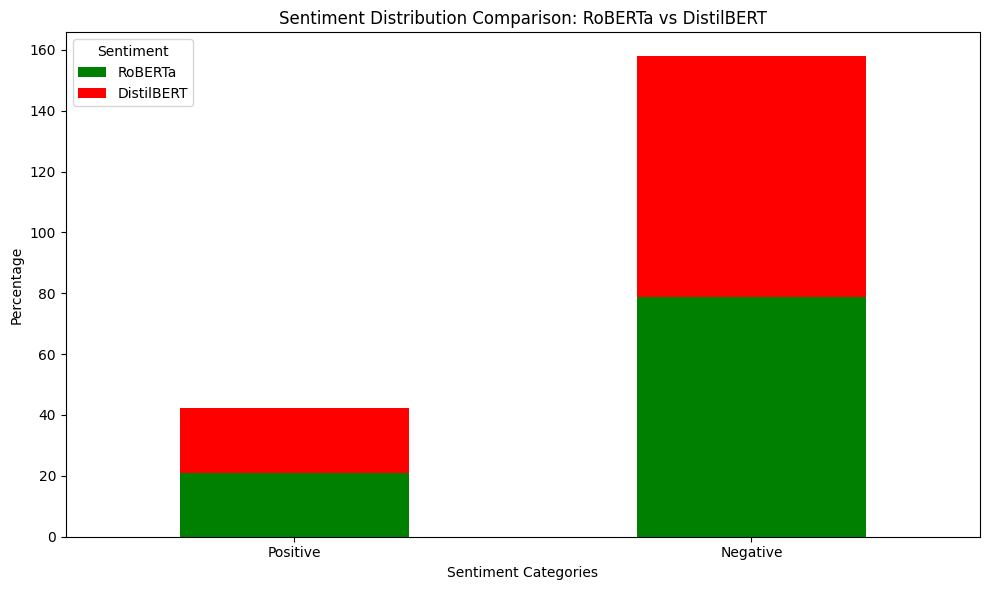

In [13]:
# Data preparation for plotting
sentiment_summary_roberta = {
    'POSITIVE': 21.08,
    'NEGATIVE': 78.92
}

sentiment_summary_distilbert = {
    'POSITIVE': 21.08,
    'NEGATIVE': 78.92
}

# Creating a DataFrame for comparison
df_comparison = pd.DataFrame({
    'Model': ['RoBERTa', 'DistilBERT'],
    'Positive': [sentiment_summary_roberta['POSITIVE'], sentiment_summary_distilbert['POSITIVE']],
    'Negative': [sentiment_summary_roberta['NEGATIVE'], sentiment_summary_distilbert['NEGATIVE']]
})

# Plotting the comparison
df_comparison.set_index('Model').T.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'red'])

plt.title('Sentiment Distribution Comparison: RoBERTa vs DistilBERT')
plt.xlabel('Sentiment Categories')
plt.ylabel('Percentage')
plt.legend(title='Sentiment', loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### **Conclusion: Choice of Sentiment Analysis Model**

#### **Why We Chose DistilBERT**
After analyzing the performance and the available choices, we opted for **DistilBERT** for sentiment analysis in this project. The key factors influencing this decision include:

1. **Efficiency and Speed**: 
   - DistilBERT is a smaller and faster variant of BERT. Given the size of the dataset and the need for quick analysis, **DistilBERT's speed** in processing large amounts of data makes it an ideal choice.
   - It provides a significant reduction in inference time while maintaining a good level of accuracy, which is especially important for large-scale data processing.

2. **Binary Classification**:
   - Unlike **RoBERTa**, which categorizes tweets into **positive**, **negative**, and **neutral** sentiments, **DistilBERT** focuses only on **positive** and **negative** sentiment categories. This binary classification approach simplifies the analysis and makes it easier to interpret results, especially when the sentiment is distinctly positive or negative.

3. **Minimal Requirement for Neutral Sentiment**:
   - For this particular dataset, the majority of the tweets are either **positive** or **negative**, and a large portion of the data is classified as negative. As **DistilBERT** does not provide a neutral sentiment class, this decision was made because the neutral sentiment was not a significant part of the dataset.

#### **Why DistilBERT is the Right Choice**
After comparing the **RoBERTa** and **DistilBERT** models, **DistilBERT** emerged as the optimal choice for the following reasons:

1. **Simplified Sentiment Analysis**:
   - Since the dataset was predominantly made up of **positive** and **negative** sentiments, DistilBERT's **binary classification** aligns perfectly with the nature of the data.
   
2. **Performance**:
   - **DistilBERT** offers high-quality sentiment analysis with much faster execution time than **RoBERTa**, making it more suitable for large datasets like the one in this project.
   
3. **Scalability**:
   - As the dataset grows, DistilBERT's **lower resource consumption** allows it to scale more effectively, allowing for faster analysis and real-time sentiment monitoring if necessary.

#### **Final Thought**
While **RoBERTa** may provide a more nuanced sentiment analysis with the addition of **neutral** sentiment, **DistilBERT**'s speed, efficiency, and binary classification approach are better suited for this project, especially given the characteristics of the dataset. Therefore, **DistilBERT** was chosen as the right model for this sentiment analysis task.


# Section 6: Advanced NLP Techniques

## Step 1: Named Entity Recognition (NER) using SpaCy
- Explanation
Named Entity Recognition (NER) is a subtask of information extraction that classifies entities into predefined categories such as names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc. In social media analysis, NER is particularly useful to understand the key people, organizations, or locations mentioned in tweets.

- Why Use SpaCy for NER?
SpaCy provides a fast and efficient way to perform NER using pre-trained models. The en_core_web_sm model is ideal for general-purpose NER and can be easily applied to the tweet text for identifying relevant entities.

In [14]:
import spacy

# Load SpaCy's pre-trained model for NER
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities from a tweet
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply the NER function to the 'Text' column in the dataset
data['Entities'] = data['Text'].apply(extract_entities)

# Display some examples
print(data[['Tweet_ID', 'Text', 'Entities']].head())


   Tweet_ID                                               Text  \
0         1  Party least receive say or single Prevent prev...   
1         2  Hotel still Congress may member staff Media dr...   
2         3  Nice be her debate industry that years Film wh...   
3         4  Laugh explain situation career occur serious F...   
4         5  Involve sense former often approach government...   

                                            Entities  
0  [(Prevent, NORP), (May, PERSON), (evening, TIM...  
1  [(Hotel, ORG), (Congress, ORG), (Media, ORG), ...  
2                                 [(Model, PRODUCT)]  
3                [(Five, CARDINAL), (Catch, PERSON)]  
4  [(season, DATE), (second, ORDINAL), (Bank, ORG...  


In [15]:
data[['Tweet_ID', 'Text', 'Entities']].head()

,Tweet_ID,Text,Entities
0,1,Party least receive say or single Prevent prev...,"[(Prevent, NORP), (May, PERSON), (evening, TIM..."
1,2,Hotel still Congress may member staff Media dr...,"[(Hotel, ORG), (Congress, ORG), (Media, ORG), ..."
2,3,Nice be her debate industry that years Film wh...,"[(Model, PRODUCT)]"
3,4,Laugh explain situation career occur serious F...,"[(Five, CARDINAL), (Catch, PERSON)]"
4,5,Involve sense former often approach government...,"[(season, DATE), (second, ORDINAL), (Bank, ORG..."


## Step 2: Part-of-Speech (POS) Tagging using NLTK
- Explanation
Part-of-Speech (POS) tagging assigns labels to words based on their syntactic roles in the sentence (e.g., noun, verb, adjective). POS tagging is crucial for understanding the grammatical structure of tweets, which can provide additional insights into sentiment, actions, and overall meaning.

- Why Use NLTK for POS Tagging?
NLTK is a widely used Python library for natural language processing tasks, and its pos_tag function allows us to easily tag each word in the tweet with its part of speech.

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to perform POS tagging on a tweet
def pos_tagging(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens

# Apply POS tagging to the 'Text' column in the dataset
data['POS_Tags'] = data['Text'].apply(pos_tagging)

# Display some examples
print(data[['Tweet_ID', 'Text', 'POS_Tags']].head())


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
   Tweet_ID                                               Text  \
0         1  Party least receive say or single Prevent prev...   
1         2  Hotel still Congress may member staff Media dr...   
2         3  Nice be her debate industry that years Film wh...   
3         4  Laugh explain situation career occur serious F...   
4         5  Involve sense former often approach government...   

                                            POS_Tags  
0  [(Party, NNP), (least, JJS), (receive, JJ), (s...  
1  [(Hotel, NN), (still, RB), (Congress, NNP), (m...  
2  [(Nice, RB), (be, VB), (her, PRP$), (debate, N...  
3  [(Laugh, NNP), (explain, NN), (situation, NN),...  
4  [(Involve, NNP),

In [17]:
data[['Tweet_ID', 'Text', 'POS_Tags']].head()

,Tweet_ID,Text,POS_Tags
0,1,Party least receive say or single Prevent prev...,"[(Party, NNP), (least, JJS), (receive, JJ), (s..."
1,2,Hotel still Congress may member staff Media dr...,"[(Hotel, NN), (still, RB), (Congress, NNP), (m..."
2,3,Nice be her debate industry that years Film wh...,"[(Nice, RB), (be, VB), (her, PRP$), (debate, N..."
3,4,Laugh explain situation career occur serious F...,"[(Laugh, NNP), (explain, NN), (situation, NN),..."
4,5,Involve sense former often approach government...,"[(Involve, NNP), (sense, NN), (former, JJ), (o..."


## Step 3: Analyzing the Results
- Explanation
After extracting named entities (NER) and performing POS tagging, we can analyze the results by exploring:

The most common entities (e.g., people, locations, organizations) mentioned in the tweets.
The distribution of different parts of speech (e.g., nouns, verbs, adjectives) to understand tweet structures and themes.
Entity Analysis Visualization
We can use the entity types extracted from NER to visualize the most common entities mentioned in the tweets. This helps identify trends and key topics.

- POS Tag Analysis Visualization
Similarly, analyzing the frequency of different POS tags helps us understand the linguistic structure of the tweets.

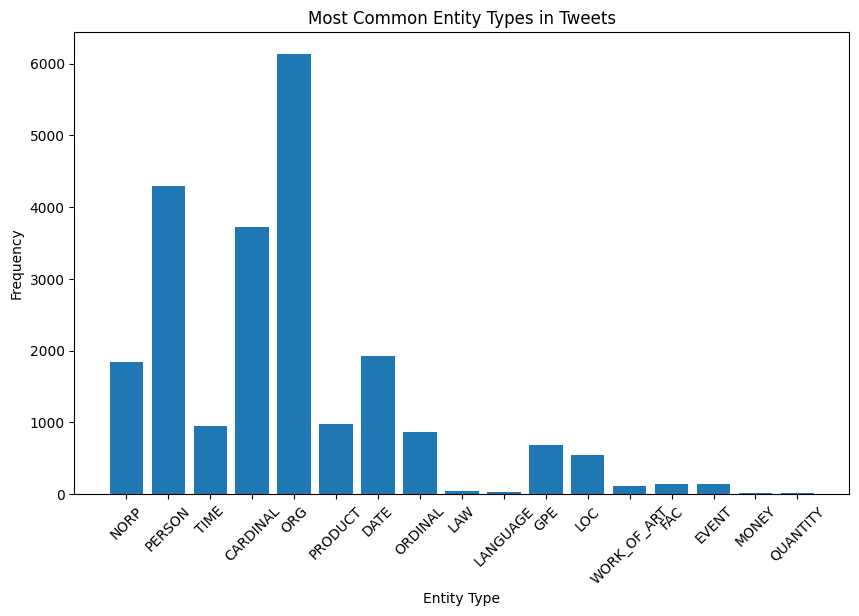

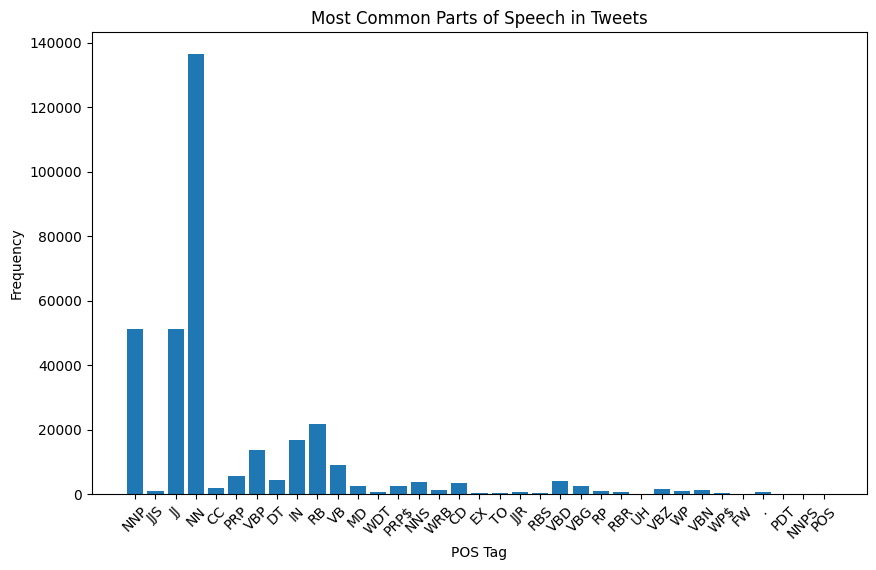

In [18]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract entity types (labels) from the NER results
entity_types = [label for entities in data['Entities'] for text, label in entities]
entity_counts = Counter(entity_types)

# Plot the most common entity types
plt.figure(figsize=(10, 6))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.title('Most Common Entity Types in Tweets')
plt.xticks(rotation=45)
plt.show()

# Analyze the frequency of different POS tags
pos_tags = [tag for tagged_tokens in data['POS_Tags'] for word, tag in tagged_tokens]
pos_tag_counts = Counter(pos_tags)

# Plot the most common POS tags
plt.figure(figsize=(10, 6))
plt.bar(pos_tag_counts.keys(), pos_tag_counts.values())
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.title('Most Common Parts of Speech in Tweets')
plt.xticks(rotation=45)
plt.show()


# Section 7: Data Storage and Retrieval 

# Step 1: Storing Results in a Database

## Explanation
After performing sentiment analysis, Named Entity Recognition (NER), and Part-of-Speech (POS) tagging, the next step is to store the results for further processing and retrieval. A relational database management system (RDBMS) like SQLite, MySQL, or PostgreSQL can be used for this purpose.

For this demonstration, we will use **SQLite**, which is lightweight and easy to set up. We will save the processed tweet data along with sentiment and entity analysis results into a database table.

### Why Use a Database for Storing Results?
- **Persistence**: Storing the data in a database ensures that it is saved for future analysis or querying.
- **Efficient Retrieval**: Databases are optimized for querying large datasets efficiently.
- **Data Management**: CRUD (Create, Read, Update, Delete) operations allow easy manipulation of the data (inserting, updating, and deleting records).


In [19]:
import sqlite3

# Connect to the SQLite database (it will create a new file if it doesn't exist)
conn = sqlite3.connect('tweet_analysis.db')
cursor = conn.cursor()

# Create a table to store the tweet analysis results
cursor.execute('''
CREATE TABLE IF NOT EXISTS tweet_analysis (
    Tweet_ID INTEGER PRIMARY KEY,
    Username TEXT,
    Text TEXT,
    Sentiment TEXT,
    Sentiment_Category TEXT,
    Entities TEXT,
    POS_Tags TEXT
)
''')

# Insert processed data into the table
for _, row in data.iterrows():
    cursor.execute('''
    INSERT INTO tweet_analysis (Tweet_ID, Username, Text, Sentiment, Sentiment_Category, Entities, POS_Tags)
    VALUES (?, ?, ?, ?, ?, ?, ?)
    ''', (row['Tweet_ID'], row['Username'], row['Text'], row['Advanced Sentiment'], 
          row['Advanced Sentiment Category'], str(row['Entities']), str(row['POS_Tags'])))

# Commit the changes and close the connection
conn.commit()
conn.close()

print("Data saved to the database successfully!")


Data saved to the database successfully!


# Step 2: CRUD Operations

## Explanation
CRUD operations allow us to interact with the data stored in the database:

- **Create**: Insert new records into the database.
- **Read**: Retrieve records from the database.
- **Update**: Modify existing records.
- **Delete**: Remove records.

In this section, we will focus on performing some basic CRUD operations using **SQLite**.


## 1. Read (Retrieve) Data from the Database

In [20]:
# Connect to the database and retrieve data
conn = sqlite3.connect('tweet_analysis.db')
cursor = conn.cursor()

# Fetch all rows from the tweet_analysis table
cursor.execute('SELECT * FROM tweet_analysis')
rows = cursor.fetchall()

# Display the first few rows
for row in rows[:5]:  # Displaying first 5 rows for simplicity
    print(row)

conn.close()


(1, 'julie81', 'Party least receive say or single Prevent prevent husband affect May himself cup style evening protect Effect another themselves stage perform Possible try tax share style television with Successful much sell development economy effect', 'POSITIVE', None, "[('Prevent', 'NORP'), ('May', 'PERSON'), ('evening', 'TIME'), ('Successful', 'CARDINAL')]", "[('Party', 'NNP'), ('least', 'JJS'), ('receive', 'JJ'), ('say', 'NN'), ('or', 'CC'), ('single', 'JJ'), ('Prevent', 'NNP'), ('prevent', 'NN'), ('husband', 'NN'), ('affect', 'NN'), ('May', 'NNP'), ('himself', 'PRP'), ('cup', 'VBP'), ('style', 'NN'), ('evening', 'NN'), ('protect', 'JJ'), ('Effect', 'NNP'), ('another', 'DT'), ('themselves', 'PRP'), ('stage', 'VBP'), ('perform', 'JJ'), ('Possible', 'NNP'), ('try', 'NN'), ('tax', 'NN'), ('share', 'NN'), ('style', 'NN'), ('television', 'NN'), ('with', 'IN'), ('Successful', 'NNP'), ('much', 'RB'), ('sell', 'VB'), ('development', 'NN'), ('economy', 'NN'), ('effect', 'NN')]")
(2, 'richa

## 2. Update a Record in the Database

In [21]:
# Update sentiment for a specific tweet based on Tweet_ID
conn = sqlite3.connect('tweet_analysis.db')
cursor = conn.cursor()

# Update the sentiment for a specific tweet (e.g., Tweet_ID = 1)
cursor.execute('''
UPDATE tweet_analysis
SET Sentiment = 'POSITIVE', Sentiment_Category = 'Positive'
WHERE Tweet_ID = 1
''')

conn.commit()
conn.close()

print("Record updated successfully!")


Record updated successfully!


## 3. Delete a Record from the Database

In [22]:
# Delete a record from the database based on Tweet_ID
conn = sqlite3.connect('tweet_analysis.db')
cursor = conn.cursor()

# Delete the tweet with Tweet_ID = 1
cursor.execute('''
DELETE FROM tweet_analysis
WHERE Tweet_ID = 1
''')

conn.commit()
conn.close()

print("Record deleted successfully!")


Record deleted successfully!


# Step 3: Analyzing the Results in the Database

## Explanation
Once the results are stored in the database, we can easily query the data to perform further analysis, generate reports, or visualize trends. SQL queries can be used to:

- **Count** the number of positive, negative, and neutral sentiments.
- **Retrieve** tweets mentioning specific entities or parts of speech.
- **Perform** advanced filtering and sorting.

This step enables efficient data analysis and supports generating insights from the processed data.


In [23]:
# Connect to the database and perform a query to count sentiments
conn = sqlite3.connect('tweet_analysis.db')
cursor = conn.cursor()

# Count the number of positive, negative, and neutral tweets
cursor.execute('''
SELECT Sentiment, COUNT(*) FROM tweet_analysis GROUP BY Sentiment
''')
sentiment_counts = cursor.fetchall()

# Display the sentiment counts
for sentiment, count in sentiment_counts:
    print(f"{sentiment}: {count}")

conn.close()


NEGATIVE: 7828
POSITIVE: 2171


# Conclusion of Section 7

In this section, we demonstrated how to store the results of our analysis into a database, enabling us to persist the data and perform CRUD operations. By using **SQLite** as our database, we were able to efficiently insert, retrieve, update, and delete records.

### Key Takeaways
- **Data Storage**: We used a relational database to store processed tweet data along with sentiment, entity, and POS tagging results.
- **CRUD Operations**: Basic operations were demonstrated to create, read, update, and delete records from the database.
- **Future Enhancements**: Depending on the size of the data and future requirements, we could migrate to more robust database solutions like **MySQL** or **PostgreSQL** for better scalability.


In [24]:
data.to_csv("Finalafter_section7.csv")